## Regresión logística multiclase

Enlace a los datos [Aqui](https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset). La data consiste de la clasificacion de distintos tipos de frijoles secos. Para saber que tipo de fijol es tenemos las siguientes caracteristicas:
- Area (A): area del frijol.
- Perimeter (P):Perimetro del frijol definido como la longitud de su borde.
- Major_axis_length (L): Longitud maxima del frijol medido como la distancia entre los extremos de la linea mas larga que se puede trazar en el frijol 
- Minor_axis_length (l): Longitud minima del frijol medida como la distancia trazada en el frijol estando perpendicular al eje principal.
- Aspect_ratio (K): Definido como la relacion entre L y l
- Eccentricity (Ec): Excentricidad de la elipse del frijol.
- Convex_area (C): Numero de pixeles del poligono convexo mas pequeño que puede contener el area de una semilla de frijol
- Equivalent_diameter (Ed): Diametro de un circulo que tiene la misma superficie que una semilla de frijol.
- Extent (Ex): Relacion entre los pixeles del cuadro delimitador y el area del frijol.
- Solidity (S): Tambien conocido como convexidad. Es la relacion entre los pixeles de la cascara convexa y los que se encuentran en los granos.
- Roundness (R): Se calcula mediante la siguiente formula: (4piA)/(P^2)
- Compactness (CO): Mide la redondez de un objeto: Ed/L
- ShapeFactor1 (SF1): Factor de forma 1
- ShapeFactor2 (SF2): Factor de forma 2
- ShapeFactor3 (SF3): Factor de forma 3
- ShapeFactor4 (SF4): Factor de forma 4
- Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira): Son los tipos de frijol (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira)

## Importar librerías


In [70]:
# import packages
import matplotlib.pyplot as plt # visualizacion de datos
import numpy as np  # manejo algebraico
import pandas as pd # manejo de dataframes
from sklearn.model_selection import train_test_split    # dividir la data en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression     # Regresion logistica
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay    # metricas de evalucacion
from sklearn.preprocessing import StandardScaler        # Escalador para estandarizar los datos
import seaborn as sns   # visualizacion de datos
sns.set()

## Carga de datos

In [71]:
df = pd.read_csv('./Dry_Bean.csv')

In [72]:
df.head(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [73]:
# Tamaño del DataFrame
df.shape

(13611, 17)

In [74]:
# verifiquemos que la clase de frijol tengan varios tipos de frijoles
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

Tenemos 7 distintos tipos de frijoles para clasificar

In [75]:
# Resumen estadistico de de las variables de tipo numerico 
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

Mediante la tabla vemos que hay 13611 registros y como la cantidad es la misma para cada variable indica que no hay valores faltante. De igual forma hacemos un chequeo mas profundo sobre los valores faltantes. 

## Drop duplicates

In [76]:
# eliminar registros duplicados
df.drop_duplicates(inplace=True)

## Manejo de datos nulos

In [77]:
# eliminar valores nulos
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## Undersampling

La regresion logistica se maneja mejor si tenemos datasets balanceados. Para ello, hacemos un analisis de cada clase sobre la cantidad de datos que contienen.

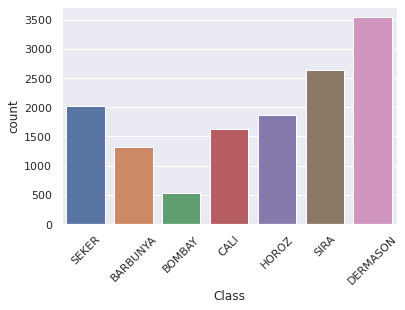

In [78]:
sns.countplot(x='Class', data=df)
plt.xticks(rotation=45)
plt.show()

El grafico nos muestra que hay mas ejemplo para la clase dermason y menos en la clase bombay. Esto afecta considerablemente el desempeño de la regresion logistica ya que aprendera a predecir mucho mejor valores de **dermason** que de **bombay**. Para datasets desbalanceados tenemos dos formas de resolver:

- Undersampling: Reducir los datos de todas las clases a la clase con minima cantidad de ejemplos, garantizando de esta forma que todos tengan la misma cantidad. La desventaja es que se pierde informacion valiosa que podria ser util.

- Crear ejemplos con la misma desviacion estandar o con la varianza o mismos parametros de cada clase para rellenar todas las clases hasta llegar a la misma cantidad de la clase con mayor ejemplos. La desventaja es que estamos creando ejemplos que no necesariamente son ciertos.

En este caso, vemos que hay mas de 500 registros de la clase minima por lo que es conveniente aplicar Undersampling.

In [79]:
# libreria para aplicar undersampling
from imblearn.under_sampling import RandomUnderSampler

# Creamos un objeto undersample 
undersample = RandomUnderSampler(random_state=42)

In [80]:
# dividimos el dataset en dos grupos
# datos sin la variable clase
X = df.drop('Class',axis=1)

# datos de la variable clase
y = df.Class

In [81]:
# pasamos ambos grupos al metodo fit_resample para ajustar la data
X_over , y_over = undersample.fit_resample(X,y)

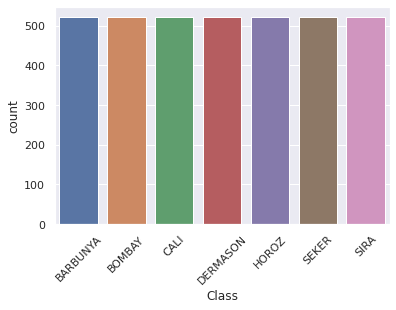

In [82]:
# Graficamos las clases contenidas en X_over
sns.countplot(x=y_over, data=X_over)
plt.xticks(rotation=45)
plt.show()

In [83]:
df.shape

(13543, 17)

In [84]:
X_over.shape

(3654, 16)

De esta manera hemos ajustado las demas variables a la variable con minima cantidad de datos.

## Conversión a numéricos

Convertimos las clases a valores numericos para que sea mejor procesado por el modelo

In [85]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [86]:
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)

In [87]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

De esta manera tenemos los valores de cada clase convertido a numeros

## Análisis exploratorio de datos

### Corrrelations

In [88]:
# agrupamos los datos nuevamente para analizar todo el conjunto. Copia de los datos
df_dea = X_over.copy(deep=True)
df_dea['Class'] = y_over

df_dea.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2754  70776   1060.894       386.619944       234.100208      1.651515   
2506  66370   1004.139       339.287072       249.883085      1.357783   
2267  60736    985.501       342.445302       226.741775      1.510288   
2449  65219   1011.110       353.650546       235.308999      1.502920   
2076  51332    889.637       330.822804       198.618899      1.665616   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
2754      0.795842       71978     300.191276  0.775763  0.983300   0.790227   
2506      0.676443       67637     290.697280  0.720536  0.981268   0.827169   
2267      0.749393       61680     278.085377  0.789353  0.984695   0.785854   
2449      0.746512       66672     288.165594  0.719436  0.978207   0.801654   
2076      0.799716       52283     255.651975  0.751688  0.981811   0.815028   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
2754     0.776451      0.005463      0.001225      0.602875      0.995658   
2506     0.856789      0.005112      0.001699      0.734087      0.996731   
2267     0.812058      0.005638      0.001512      0.659438      0.995941   
2449     0.814831      0.005423      0.001475      0.663950      0.997864   
2076     0.772776      0.006445      0.001418      0.597183      0.994678   

      Class  
2754      1  
2506      1  
2267      1  
2449      1  
2076      1

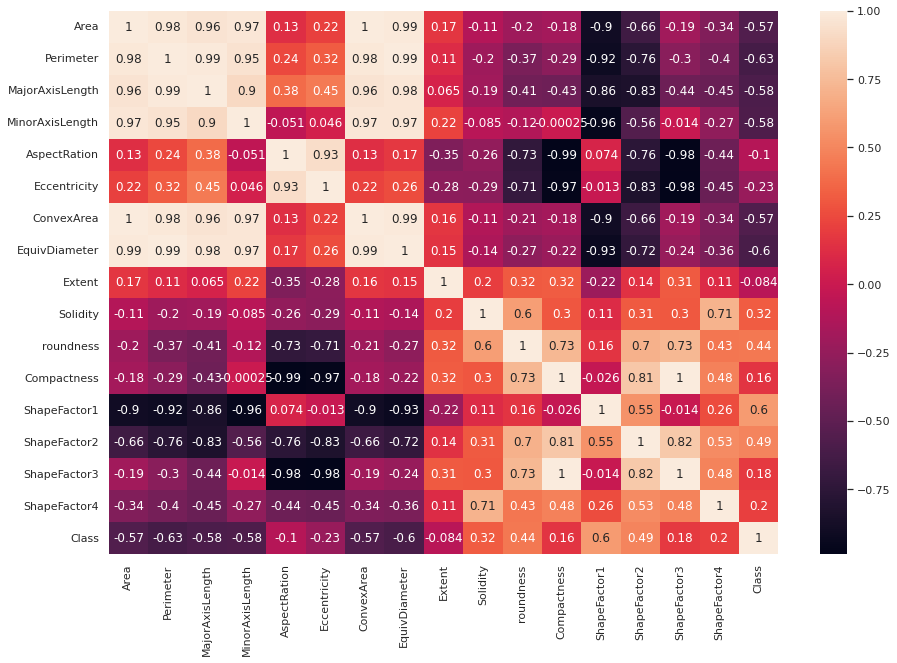

In [89]:
# creamos un heatmap de correlacion de todas las variables numericas
plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(), annot=True)
plt.show()

El objetivo es ver las variables que estan altamente correlacionadas entre si para descartarlas del modelo. De la grafica deducimos que:

- ConvexArea esta altamente correlacionado con Area, Perimeter, MajorAxisLenght, MinorAxisLenght. Esto sugiere que tal variable podria estar ofreciendo la misma informacion que las demas, es redundante, lo que podria contribuir al overfitting por lo que la eliminamos
- EquivDiameter tambien esta altamente correlacionada con Area, Perimeter, MajorAxisLenght, MinorAxisLenght por lo que tambien se omite del analisis.
- Perimeter, Area, MajorAxisLenght y MinorAxisLenght estan altamente correlacionado con la variable objetivo Class. 

Eliminamos las variables ConvexArea y EquivDiameter

In [90]:
X_over.drop(['ConvexArea','EquivDiameter'], axis=1, inplace=True) 

# verificamos que ya no esten en el dataset
X_over.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2754  70776   1060.894       386.619944       234.100208      1.651515   
2506  66370   1004.139       339.287072       249.883085      1.357783   
2267  60736    985.501       342.445302       226.741775      1.510288   
2449  65219   1011.110       353.650546       235.308999      1.502920   
2076  51332    889.637       330.822804       198.618899      1.665616   

      Eccentricity    Extent  Solidity  roundness  Compactness  ShapeFactor1  \
2754      0.795842  0.775763  0.983300   0.790227     0.776451      0.005463   
2506      0.676443  0.720536  0.981268   0.827169     0.856789      0.005112   
2267      0.749393  0.789353  0.984695   0.785854     0.812058      0.005638   
2449      0.746512  0.719436  0.978207   0.801654     0.814831      0.005423   
2076      0.799716  0.751688  0.981811   0.815028     0.772776      0.006445   

      ShapeFactor2  ShapeFactor3  ShapeFactor4  
2754      0.001225      0.602875      0.995658  
2506      0.001699      0.734087      0.996731  
2267      0.001512      0.659438      0.995941  
2449      0.001475      0.663950      0.997864  
2076      0.001418      0.597183      0.994678

## Visualización de datos

Creamos un diagrama de dispersion entre todas las variables

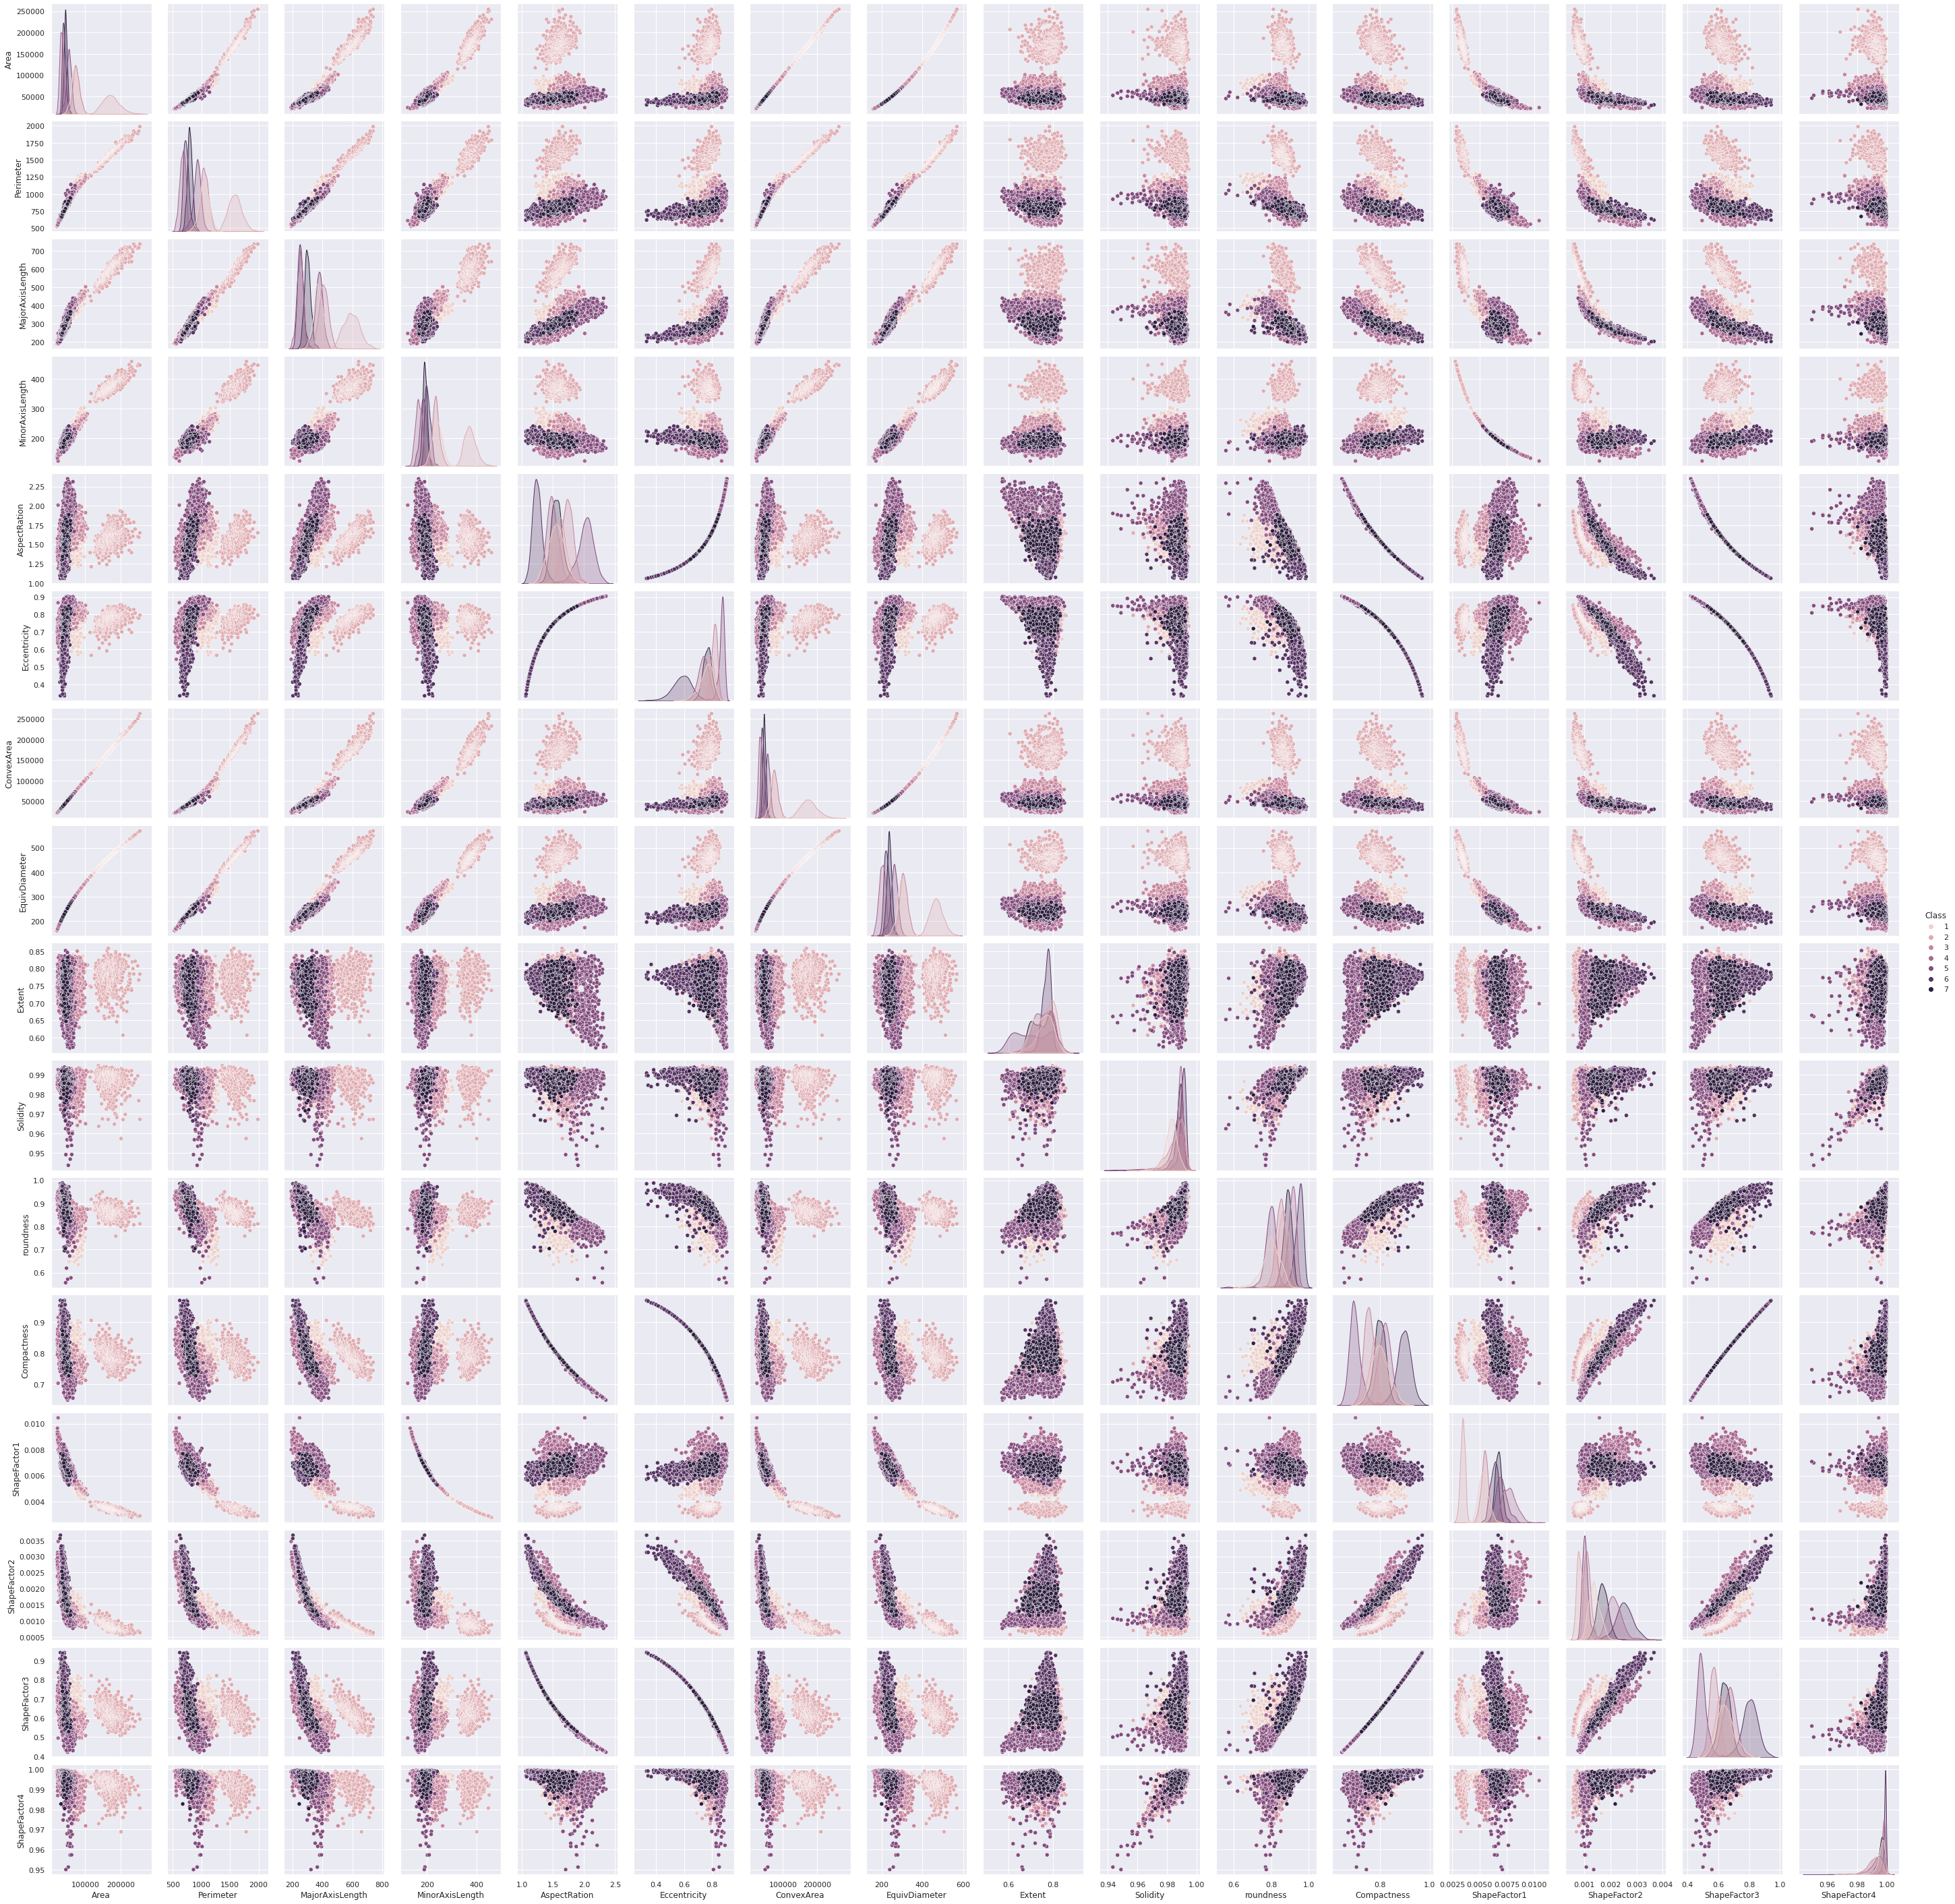

In [101]:
#sns.pairplot(df_dea, hue='Class');

El pairplot nos muestras algunas graficas donde se puede evidenciar que los frijoles se agrupan de manera que son linealmente separables. Se muestran distribuciones en ciertas areas en las que son altamente clasificables 

## Split y escalamiento de datos

Vamos a dividir los datos en dos conjuntos: De entrenamiento y de prueba. Ademas, los escalaremos para quesea interpretado correctamente por el modelo

In [102]:
# Dividimos los datos en entrenamiento y prueba
# X_over es el dataframe con los features excepto losdos eliminados
# y_over contiene la clasificacion numerica de las clases
# Para mejorar la distribucion de las clases usamos shuffle
X_train, X_test, y_train , y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= .2)

In [103]:
# Escalamos los datos
# Objeto Escalador
st_x = StandardScaler()

# aplicamos el escalador a los datos de entrenamiento y los entrenamos
X_train = st_x.fit_transform(X_train) 

# a los datos de prueba solo aplicamos el escalador sin entrenar para que no
# se lleve informacion del entrenamiento
X_test = st_x.transform(X_test)

## Modelo multiclase

Creamos una funcion que genere modelos de acuerdo a los siguientes parametros: C, solver y muticlass

In [104]:
def logistic_model(C_,solver_ , multiclass_):
    #random_state: puede ir cualquier valor. Es para replicar los resultados
    #solver: le pasamos solver_ como parametro
    #multi_class: le pasamos multi_class_ como parametro
    #n_jobs: permite utilizar todos los core disponibles
    #C: es el parametro para el regularizer
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_ )
    return logistic_regression_model

In [105]:
# creamos un modelo con lambda 1, un solver de tipo saga y un multiclass de tipo multinomial 
model = logistic_model(1,'saga','multinomial')

# Entrenamos el modelo
model.fit(X_train, y_train)

# Generamos una prediccion
predictions = model.predict(X_test)

# Matriz de confusion entre los valores de prueba y la prediccion
print(confusion_matrix(y_test,predictions))

# Mostramos el puntaje de precision
print(accuracy_score(y_test,predictions))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Se obtiene un accuracy del 92.47%, una precision bastante alta pero no sabemos si es la mas alta que podemos conseguir con otros modelos

Vamos a probar otros modelos con diferentes parametros en lo que sigue

In [106]:
# Lista con los tipos de multiclase
multiclass = ['ovr','multinomial']

# Lista con los tipos de solver
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

# Lista para guardar los scores
scores = []

# Lista para guardar los parametros
params=[]

# iteramos sobre cada mlticlase
for i in multiclass:
    # iteramos sobre cada solver
    for j in solver_list:
        # aplicamos una excepcion ya que hay modelos que no pueden funcionar
        # con ciertos parametros o ciertos regularizer
        try:
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + '-'+ j)
            accuraccy = accuracy_score(y_test,predictions)
            scores.append(accuraccy)
        except:
            None    

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jber

Una vez entrenado todos los modelos pasamos a evaluar los resultados visualizando cual de ellos arroja un mejor puntaje de accuracy

## Evaluación de resultados

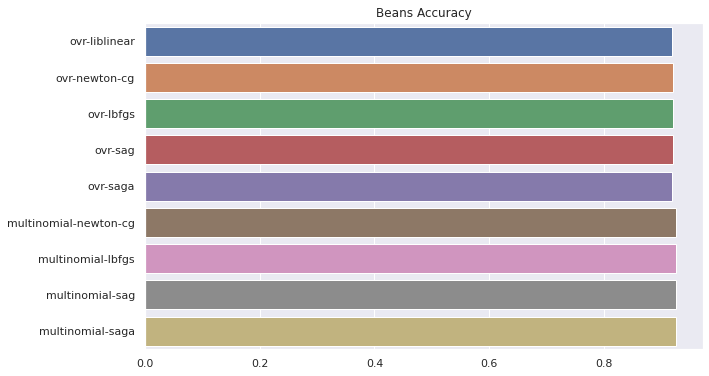

In [107]:
fig = plt.figure(figsize=(10,6))
sns.barplot(y=params, x=scores).set_title('Beans Accuracy');


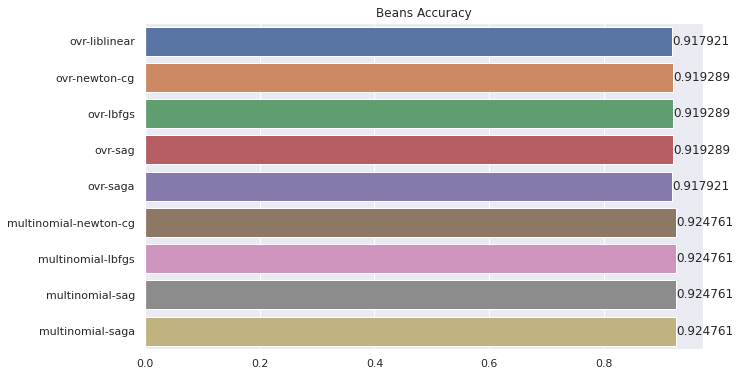

In [108]:
# Otra forma de mostrar la grafica con los valores de accuracy
fig, ax1 = plt.subplots(figsize=(10,6))

ax = sns.barplot(
        ax=ax1,
        y  = params,
        x = scores
        )
ax.set_title('Beans Accuracy')
ax.bar_label(ax.containers[0])
plt.show()

La grafica nos muestra que el modelo **Multinomial-newton_sg** es el que mejor accuracy tiene. Lo siguiente es utilizar los parametros de dicho modelo para generar una prediccion 

In [109]:
# Modelos con mejor desempeno
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


Obtenemos un accuracy del 92.47% igual de preciso que el modelo anterior. Ademas la matriz de confusion muestra que el modelo tiene un numero bajo de equivocaciones lo cual es un gran resultado.

Para mejorar la visualizacion de la matriz de confusion procedemos como sigue:

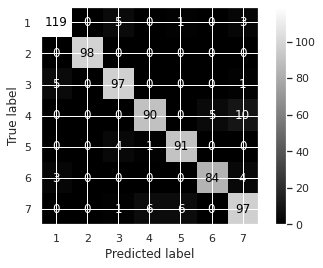

In [110]:
# matriz de confusion con los datos de prueba y las predicciones
# labels: son las etiquetas de la variable objetivo
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Visualizacion de la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

Claramente vemos que el modelo acierta 
- 119 veces al predecir el frijol tipo 1 con 8 desaciertos
- 98 veces al predecir el frijol tipo 2 sin equivocarse
- 97 veces al predecir el frijol tipo 3 con solo 10 desacierto
- 90 veces al predecir el frijol tipo 4 con solo 7 desaciertos...

## Forma alternativa de encontrar el mejor modelo

Para ello vamos a utilizar el metodo GridSearchCV

In [111]:
# importamos librerias
from sklearn.model_selection import GridSearchCV 
import warnings

In [112]:
warnings.filterwarnings('ignore')

In [113]:
# definimos los parametros de Grid
parameters = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'],
    'multi_class':['ovr', 'multinomial']
}

In [114]:
# Creamos el modelo con valores por defecto
model_RL = LogisticRegression()

In [115]:
# Creamos el grid
clf = GridSearchCV(model_RL,                # modelo
                   param_grid=parameters,   # hyperparametros
                   scoring='accuracy',      # metricas requeridas
                   cv=10)

In [116]:
# Entrenamos los modelos pasados en el grid
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga',
                                    'sag']},
             scoring='accuracy')

In [123]:
# Mostramos los hipermarametros y la precision del mejor modelo
print('Mejores Hiperparametros: ', clf.best_params_)
print('Precicion del mejor modelo: ', clf.best_score_.round(4)*100)

Mejores Hiperparametros:  {'multi_class': 'multinomial', 'solver': 'newton-cg'}
Precicion del mejor modelo:  93.57


## Evaluacion de los resultados del mejor modelo

El modelo **clf** ya se encuentra entrenado con los mejores hiperparametros por lo que ya se encuentra listo para hacer predicciones

In [124]:
predictions2 = clf.predict(X_test)

print(confusion_matrix(y_test,predictions2))
print(accuracy_score(y_test,predictions2))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847
